In [6]:
import numpy as np
from sklearn.neural_network import BernoulliRBM

In [8]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot = False)

X_train = np.random.permutation(mnist.train.images) # Returns np.array

X_train = np.random.binomial(1,X_train) #sample bernoulli

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [46]:
model = BernoulliRBM(n_components=700, learning_rate= 0.1, batch_size=60, n_iter=30, verbose=1, random_state=0) 
model.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -103.01, time = 38.67s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -91.80, time = 50.65s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -86.60, time = 49.27s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -85.84, time = 47.42s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -82.55, time = 50.20s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -83.71, time = 43.79s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -81.45, time = 48.34s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -80.53, time = 46.01s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -79.68, time = 46.37s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -78.42, time = 46.12s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -79.43, time = 47.31s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -78.40, time = 47.08s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -77.75, time = 48.83s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -78.34, time = 53.50s
[BernoulliRBM]

BernoulliRBM(batch_size=60, learning_rate=0.1, n_components=700, n_iter=30,
       random_state=0, verbose=1)

In [47]:
def show_digit(original, fake):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.imshow(original.reshape((28,28)),cmap = plt.cm.gray)
    ax1.set_title('Original digit')
    ax2.imshow(fake.reshape((28,28)),cmap = plt.cm.gray)
    ax2.set_title('Sampled digit')
    plt.show()

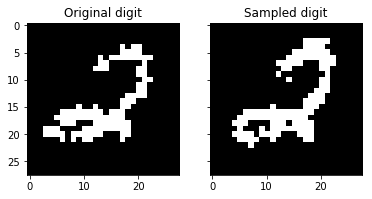

In [53]:
pict = 1
show_digit(X_train[pict], model.gibbs( X_train[pict] ) )

In [52]:
model.score_samples(X_train).mean()

-75.55037493272273

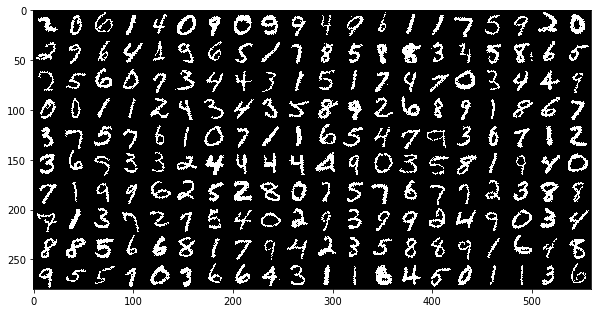

In [55]:
def gen_mnist_image(X):
    return np.rollaxis(np.rollaxis(X[0:200].reshape(20, -1, 28, 28), 0, 2), 1, 3).reshape(-1, 20 * 28)

def gen_mnist_image_sampled_gib(X):
    return np.rollaxis(np.rollaxis(model.gibbs(X[0:200]).reshape(20, -1, 28, 28), 0, 2), 1, 3).reshape(-1, 20 * 28)


plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(X_train),cmap='gray');

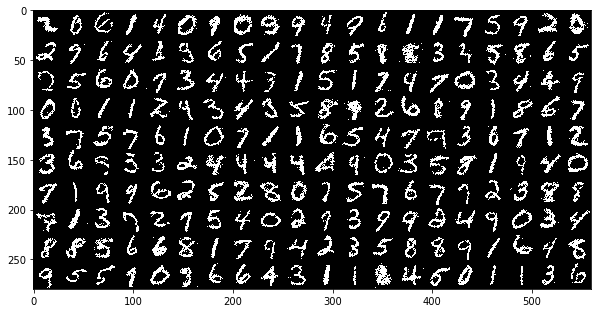

In [56]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image_sampled_gib(X_train),cmap='gray')